In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.engine.sequential import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
data=pd.read_csv("forestfires.csv")

In [3]:
pd.set_option("display.max_columns", 31)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [4]:
data.shape

(517, 31)

In [5]:
data["month"].value_counts()


aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [6]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [8]:
data=data.drop_duplicates()

In [9]:
data.shape

(509, 31)

In [10]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


C:\Users\DEEPIKA SHERAWAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='rain'>

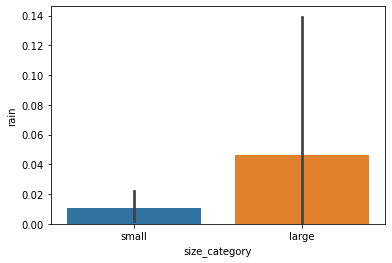

In [11]:
sns.barplot(data["size_category"],data["rain"])

In [12]:
y_count = data.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})

,size_category,counts
0,small,371
1,large,138


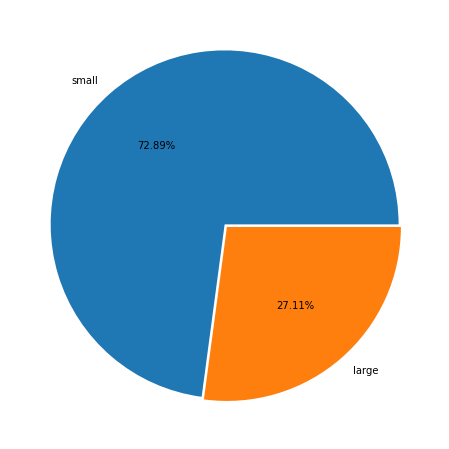

In [13]:
plt.figure(figsize=(8,8))
plt.pie(y_count.counts, labels=y_count['size_category'], autopct='%1.2f%%', explode=(0,0.02))
y_count

In [14]:
month_data = data.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_data.head(10)

,size_category,month,count
11,small,aug,135
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
13,small,feb,14
16,small,jun,13
6,large,mar,11
20,small,oct,11


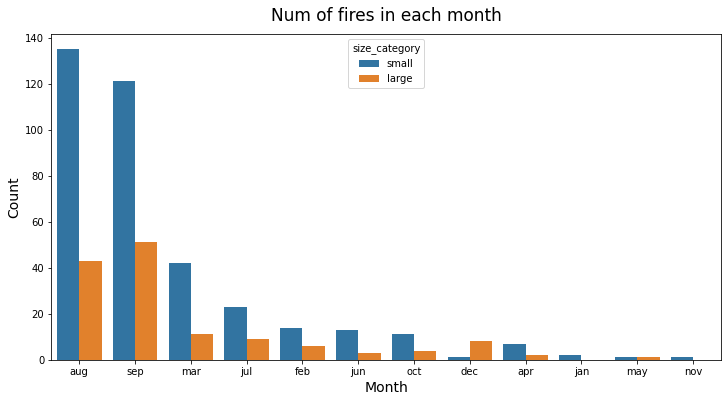

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x='month', y = 'count', hue='size_category', data= month_data)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [16]:
day_data = data.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_data

,size_category,day,count
10,small,sun,67
7,small,fri,62
9,small,sat,57
8,small,mon,55
11,small,thu,47
12,small,tue,43
13,small,wed,40
3,large,sun,27
2,large,sat,25
0,large,fri,21


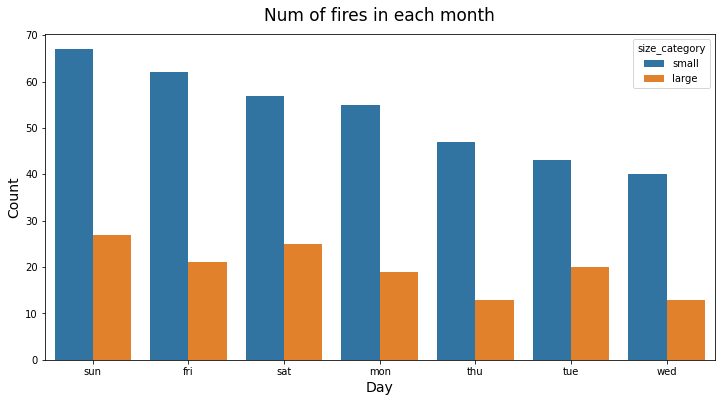

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='day', y = 'count', hue='size_category', data= day_data)
plt.title("Num of fires on each day", fontsize=17, y=1.02)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data["month"]=label_encoder.fit_transform(data["month"])
data["day"]=label_encoder.fit_transform(data["day"])
data["size_category"]=label_encoder.fit_transform(data["size_category"])

In [19]:
array=data.values
X=array[:,0:30]
Y=array[:,30]

In [20]:
X.shape

(509, 30)

In [21]:
Y.shape

(509,)

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(45, input_dim=30, activation='sigmoid'))
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 45)                1395      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1380      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 2,806
Trainable params: 2,806
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history=model.fit(X_train, Y_train, validation_split=0.20,epochs=50, batch_size=100)

Epoch 1/50
4/4 [==============================] - 1s 97ms/step - loss: 0.6456 - accuracy: 0.7323 - val_loss: 0.6415 - val_accuracy: 0.6829
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 0.6161 - accuracy: 0.7323 - val_loss: 0.6282 - val_accuracy: 0.6829
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.5957 - accuracy: 0.7323 - val_loss: 0.6252 - val_accuracy: 0.6829
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 0.5838 - accuracy: 0.7323 - val_loss: 0.6293 - val_accuracy: 0.6829
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 0.5779 - accuracy: 0.7323 - val_loss: 0.6344 - val_accuracy: 0.6829
Epoch 6/50
4/4 [==============================] - 0s 19ms/step - loss: 0.5761 - accuracy: 0.7323 - val_loss: 0.6382 - val_accuracy: 0.6829
Epoch 7/50
4/4 [==============================] - 0s 16ms/step - loss: 0.5754 - accuracy: 0.7323 - val_loss: 0.6400 - val_accuracy: 0.6829
Epoch 8/50
4/4 [===========

In [31]:
scores = model.evaluate(X_train, Y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.7666
accuracy: 76.66%


In [38]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(45, input_dim=30, activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='relu'))
model1.add(tf.keras.layers.Dense(1,activation='relu'))
model1.summary()
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model1.fit(X_train, Y_train, validation_split=0.20,epochs=100, batch_size=150)
scores = model1.evaluate(X_train, Y_train)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 45)                1395      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                460       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 1,866
Trainable params: 1,866
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 1s 118ms/step - loss: 3.8009 - accuracy: 0.7508 - val_loss: 4.8351 - val_accuracy: 0.6829
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 4.0352 - accuracy: 0.7354 - val_loss: 4.8351 - val_accuracy: 0.6829
Epoch 3/100
3/3 [==============================] - 0s 32ms/step - loss: 4.0352 - accuracy: 0.7354 - v

In [40]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(45, input_dim=30, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='relu'))
model2.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model2.summary()
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model2.fit(X_train, Y_train, validation_split=0.20,epochs=100, batch_size=150)
scores = model2.evaluate(X_train, Y_train)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 45)                1395      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                460       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 1,866
Trainable params: 1,866
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 1s 124ms/step - loss: 19.0406 - accuracy: 0.2923 - val_loss: 13.0459 - val_accuracy: 0.4024
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 10.5571 - accuracy: 0.3262 - val_loss: 5.1523 - val_accuracy: 0.4146
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 3.3184 - accuracy: 0.4646 

In [42]:
model2.history.history.keys()
import matplotlib.pyplot as plt 

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

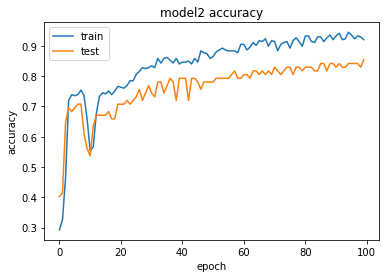

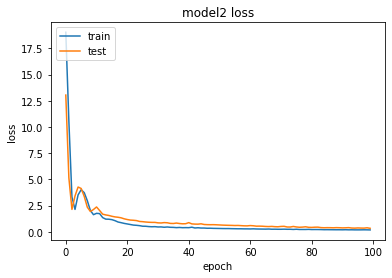

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()